<a href="https://colab.research.google.com/github/Jed-77/tensorflow-deeplearning/blob/master/TF2_0_Spam_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Imports
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Flatten, Dense, GlobalMaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
# Get the data
#!wget https://lazyprogrammer.me/course_files/spam.csv
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# Sort the data out
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [0]:
# Convert sentences to sequences of integers
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)   # creates an integer per word
tokenizer.fit_on_texts(df_train)  # make sure to tokenize on the training data
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

# Word -> Integer Mapping
word2idx = tokenizer.word_index
V = len(word2idx)

# Pad sequences so all the same length
data_train = pad_sequences(sequences_train)

# Sequence length
T = data_train.shape[1]

# Prepare test data
data_test = pad_sequences(sequences_test, maxlen=T)

In [0]:
# Create the model
D = 20   # choose the embedding dimensionality - WHICH IS THE NUMBER OF FEATURES!
M = 15   # hidden state dimensionality (number of units in hidden RNN node)

# note embedding has size V+1 as when we did padding, for the residual words
# .. not captured, they get put in this bucket.
# LSTM RNN with Global Max Pooling
i = Input(shape=(T,))
x = Embedding(V+1, D)(i)  # creates a feature vector from an integer token
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


In [0]:
# Compile and Fit
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
r = model.fit(data_train, Ytrain, epochs=10, validation_data=(data_test, Ytest))

Epoch 1/10
117/117 [==============================] - 8s 66ms/step - loss: 0.4555 - accuracy: 0.8610 - val_loss: 0.3485 - val_accuracy: 0.8684
Epoch 2/10
117/117 [==============================] - 7s 62ms/step - loss: 0.3492 - accuracy: 0.8647 - val_loss: 0.3074 - val_accuracy: 0.8684
Epoch 3/10
117/117 [==============================] - 7s 62ms/step - loss: 0.2748 - accuracy: 0.8647 - val_loss: 0.2511 - val_accuracy: 0.8684
Epoch 4/10
117/117 [==============================] - 7s 63ms/step - loss: 0.2205 - accuracy: 0.8647 - val_loss: 0.2121 - val_accuracy: 0.8684
Epoch 5/10
117/117 [==============================] - 7s 62ms/step - loss: 0.1795 - accuracy: 0.9044 - val_loss: 0.1793 - val_accuracy: 0.9451
Epoch 6/10
117/117 [==============================] - 7s 63ms/step - loss: 0.1463 - accuracy: 0.9826 - val_loss: 0.1527 - val_accuracy: 0.9706
Epoch 7/10
117/117 [==============================] - 7s 63ms/step - loss: 0.1148 - accuracy: 0.9879 - val_loss: 0.1247 - val_accuracy: 0.9788

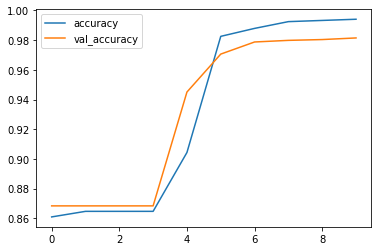

In [0]:
# Plot the accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()